# Data Import and Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
df.shape

(911, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [5]:
df.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,911.0,1969.201976,32.837978,1901.0,1946.0,1975.0,1997.0,2016.0
laureate_id,911.0,462.515917,270.236159,1.0,228.5,457.0,698.5,937.0


In [7]:
df["birth_date"] = pd.to_datetime(df["birth_date"])
df["death_date"] = pd.to_datetime(df["death_date"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  911 non-null    int64         
 1   category              911 non-null    object        
 2   prize                 911 non-null    object        
 3   motivation            823 non-null    object        
 4   prize_share           911 non-null    object        
 5   laureate_id           911 non-null    int64         
 6   laureate_type         911 non-null    object        
 7   full_name             911 non-null    object        
 8   birth_date            883 non-null    datetime64[ns]
 9   birth_city            883 non-null    object        
 10  birth_country         885 non-null    object        
 11  sex                   885 non-null    object        
 12  organization_name     665 non-null    object        
 13  organization_city   

## Decision for Missing Values
Missing values affect the accuracy of the required analysis by an acceptable amount and are in columns that will not be affected. Therefore, I prefer not to fill in the missing values and change the accuracy of the dataset. The missing values can be filled in another analysis with different tools and methods, such as mean, median or machine learning models. 

# Data Analysis

#
## Request 1 : Find the top ten countries that have won the most Nobel Prizes.
## Analysis 1

In [15]:
# I start by identifying the top 10 countries that have won the most Nobels.
ilk_on_ülke = df.groupby("organization_country").size().nlargest(10)

# I will use the “display” and “HTML” modules to customize the output.
output = "<h2>Top 10 Nobel Prize Winners</h2>"

# I create and print the information I will print for each country with a loop.
for i, (ülke, ödül) in enumerate(ilk_on_ülke.items(), start = 1):
    ülke_verisi = df[df["organization_country"] == ülke]
    en_cok = ülke_verisi["category"].value_counts().idxmax()
    kategori_sayisi = ülke_verisi["category"].value_counts().max()
    
    output += f"<p><span style='color:black; font-weight:bold;'>{i}.</span> <span style='color:blue; font-weight:bold;'>{ülke}</span> has won the Nobel Prize <span style='color:green; font-weight:bold;'>{ödül}</span> times. The category with the most wins is <span style='color:maroon; font-weight:bold;'>{en_cok} ({kategori_sayisi})</span>.</p>"
display(HTML(output))

#    
## Request 2 : List the women who won Nobel Prizes for the first time.
## Analysis 2

In [14]:
# I create a filter that brings the nobel prize won by women for the first time and assign it to the variable.
ilk_kadınlar = df[df["sex"] == "Female"].sort_values("year").drop_duplicates(subset = "full_name",keep = "first")

output = "<h2>Women Who Won Nobel Prizes For The First Time</h2>"

# Again, using a loop with the display module, I return the first nobel prize won for each woman.
for i, row in enumerate(ilk_kadınlar.reset_index().itertuples(), start=1):
    output += f"<p><span style='color:black; font-weight:bold;'>{i}.</span> <span style='color:blue; font-weight:700;'>{row.full_name}</span> First Won the Nobel Prize in <span style='color:green; font-weight:bold;'>{row.category}</span> in <span style='color:green; font-weight:bold;'>{row.year}</span>.</p>"

display(HTML(output))

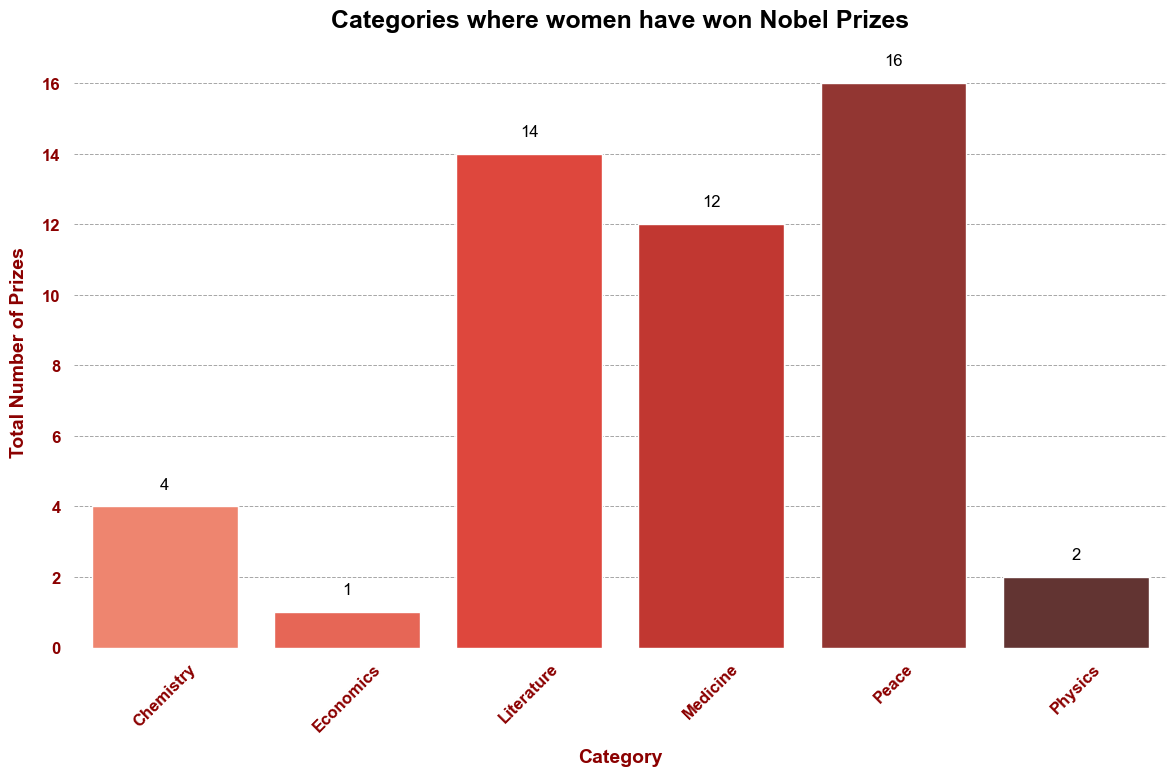

In [16]:
# Let's take a look at how many Nobel Prizes the Kandins have won in which field. 
# I'm creating a bar graph for this so we can see it more clearly in comparison.
# I will do the same steps for men.

# I am filtering the total awards won by women.
ilk_kadınlar = df[df["sex"] == "Female"]

# I calculate the number of awards by category.
ilk_kadınlar_category_count = (
    ilk_kadınlar.groupby("category").size().reset_index(name = "count")
)

# Adjusting the graph.
plt.figure(figsize = (12, 8))
sns.set(style = "whitegrid", font_scale = 1.2)

# I create bar chart.
barplot = sns.barplot(data = ilk_kadınlar_category_count, x = "category", y = "count", palette = "Reds_d", saturation = 0.9)

# Here I print the values on the bars to make them easier to read. 
for i, bar in enumerate(barplot.patches):
    value = int(bar.get_height())
    barplot.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{value}", ha = "center", fontsize = 12, color = "black")

# Title and label edits.
plt.title("Categories where women have won Nobel Prizes", fontsize = 18, fontweight = "bold", color = "black" , pad = 20)
plt.xlabel("Category", fontsize = 14, fontweight = "bold", color = "darkred", labelpad = 10)
plt.ylabel("Total Number of Prizes", fontsize = 14, fontweight = "bold", color = "darkred", labelpad = 10)
plt.xticks(rotation = 45, fontsize = 12, fontweight = "bold", color = "darkred")
plt.yticks(fontsize = 12, fontweight = "bold", color = "darkred")

# Adding a grid and removing the border to make it look more beautiful.
sns.despine(left = True, bottom = True)
plt.grid(axis = "y", linestyle = "--", linewidth = 0.7, alpha = 0.7, color = "gray")

plt.tight_layout()
plt.show()

#    
## Request 3 : List the men who won Nobel Prizes for the first time.
## Analysis 3

In [19]:
# I did not add the explanations because I did the same process with the men's filter as with the women's filter.

ilk_erkekler = df[df["sex"] == "Male"].sort_values("year").drop_duplicates(subset = "full_name",keep = "first")

output = "<h2>Women Who Won Nobel Prizes For The First Time</h2>"

for i, row in enumerate(ilk_erkekler.reset_index().itertuples(), start=1):
    output += f"<p><span style='color:black; font-weight:bold;'>{i}.</span> <span style='color:blue; font-weight:700;'>{row.full_name}</span> First Won the Nobel Prize in <span style='color:green; font-weight:bold;'>{row.category}</span> in <span style='color:green; font-weight:bold;'>{row.year}</span>.</p>"

display(HTML(output))

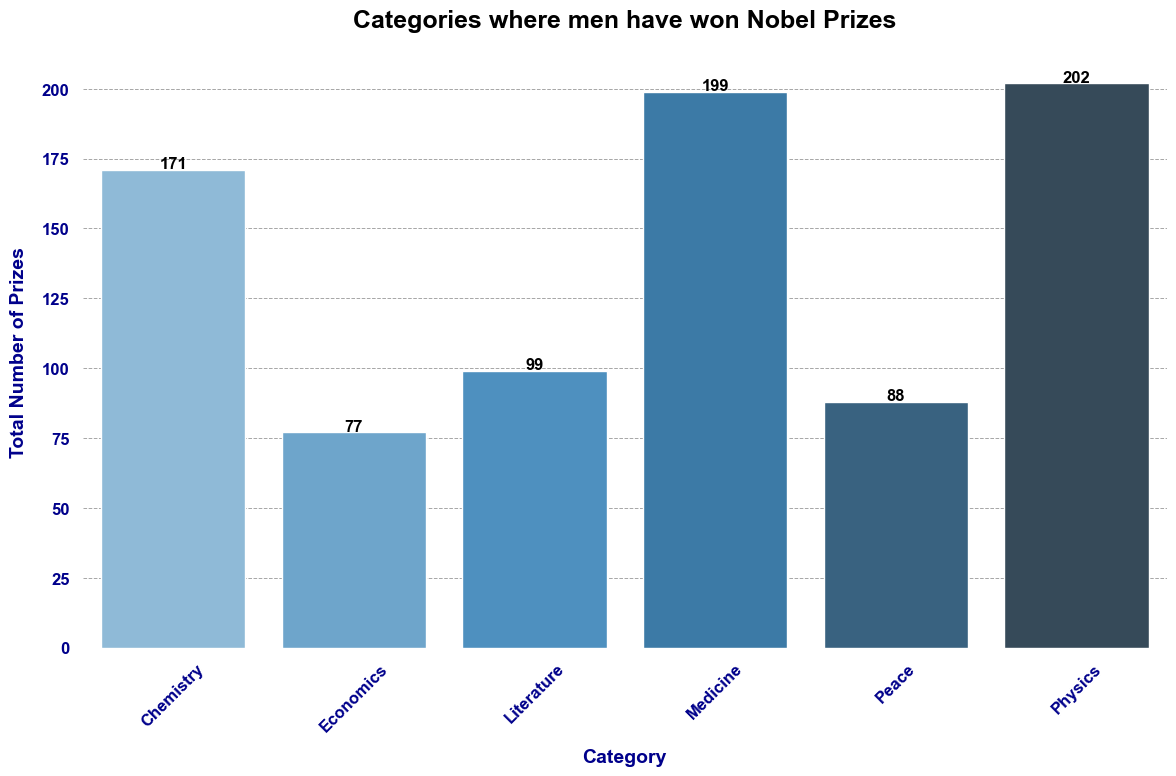

In [20]:
ilk_erkekler = df[df["sex"] == "Male"]

ilk_erkekler_category_count = (
    ilk_erkekler.groupby("category").size().reset_index(name="count")
)

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid", font_scale = 1.2)

barplot = sns.barplot(data=ilk_erkekler_category_count, x = "category", y = "count", palette = "Blues_d", saturation =0.9)

for i, bar in enumerate(barplot.patches):
    value = int(bar.get_height())
    barplot.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{value}", ha = "center", fontsize = 12, color = "black", fontweight = "bold")

plt.title("Categories where men have won Nobel Prizes", fontsize = 18, fontweight = "bold", color = "black", pad = 20)
plt.xlabel("Category", fontsize = 14, fontweight = "bold", color = "darkblue", labelpad = 10)
plt.ylabel("Total Number of Prizes", fontsize = 14, fontweight = "bold", color = "darkblue", labelpad = 10)
plt.xticks(rotation = 45, fontsize = 12, fontweight = "bold", color = "darkblue")
plt.yticks(fontsize = 12, fontweight = "bold", color = "darkblue")

sns.despine(left = True, bottom = True)
plt.grid(axis = "y", linestyle = "--", linewidth = 0.7, alpha = 0.7, color = "gray")

plt.tight_layout()
plt.show()

#    
## Request 4 : Visualize from which year the country with the most Nobel prize winners has dominated?
## Analysis 4

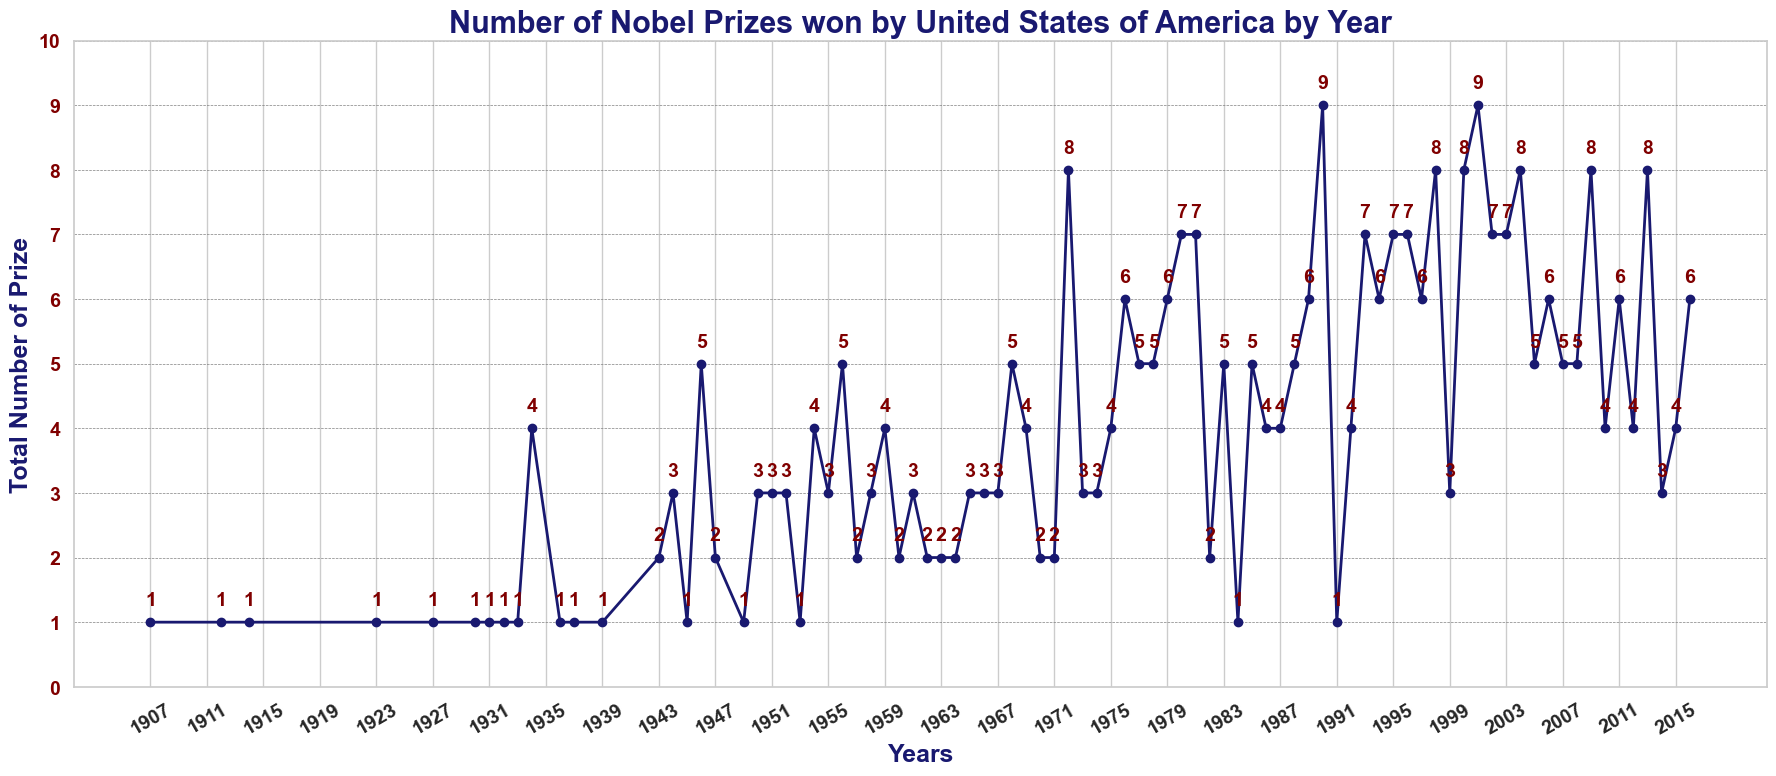

In [21]:

# Let's start by assigning variables to the country that has won the most Nobels, how much it has won and the year.
en_çok_kazanan = df["organization_country"].value_counts().idxmax()
kazanan_ülke_verisi = df[df["organization_country"] == en_çok_kazanan]
kazanan_yıllar = kazanan_ülke_verisi.groupby("year").size()

# Graph size adjustment.
plt.figure(figsize = (18, 8))

# Since it is a time-dependent data, I preferred to visualize it with a line graph.
plt.plot(kazanan_yıllar.index, kazanan_yıllar.values, color = "midnightblue", marker = "o", linestyle = "-", linewidth = 2, markersize = 6)

# The loop I use to print the values on each marker.
for i, year in enumerate(kazanan_yıllar.index):
    plt.text(year, kazanan_yıllar.iloc[i] + 0.2, f"{kazanan_yıllar.iloc[i]}", ha = "center", va = "bottom", fontsize = 14, color = "maroon", fontweight = "bold")

plt.title(f"Number of Nobel Prizes won by {en_çok_kazanan} by Year", fontsize = 22, color = "midnightblue", fontweight = "bold")
plt.xlabel("Years", fontsize = 18, color = "midnightblue", fontweight="bold")
plt.ylabel("Total Number of Prize", fontsize = 18, color = "midnightblue", fontweight = "bold")

# To make it more readable, I set the years on the X-axis to show every 4 years.
plt.xticks(range(min(kazanan_yıllar.index), max(kazanan_yıllar.index)+1, 4), fontsize = 14, rotation = 30, fontweight = "semibold")

# On the y-axis, I have arranged the ranges from 0 to 10 because the highest annual value is 9.
plt.yticks(range(0, 11, 1), fontsize = 14, color = "maroon", fontweight = "semibold")

plt.grid(axis = "y", linestyle = "--", linewidth = 0.5, color = "gray")
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()

#    
## Request 5 : Visualize the gender and age of the Nobel Prize winners using the prize category and year (Show a separate graph for each prize category)
## Analysis 5

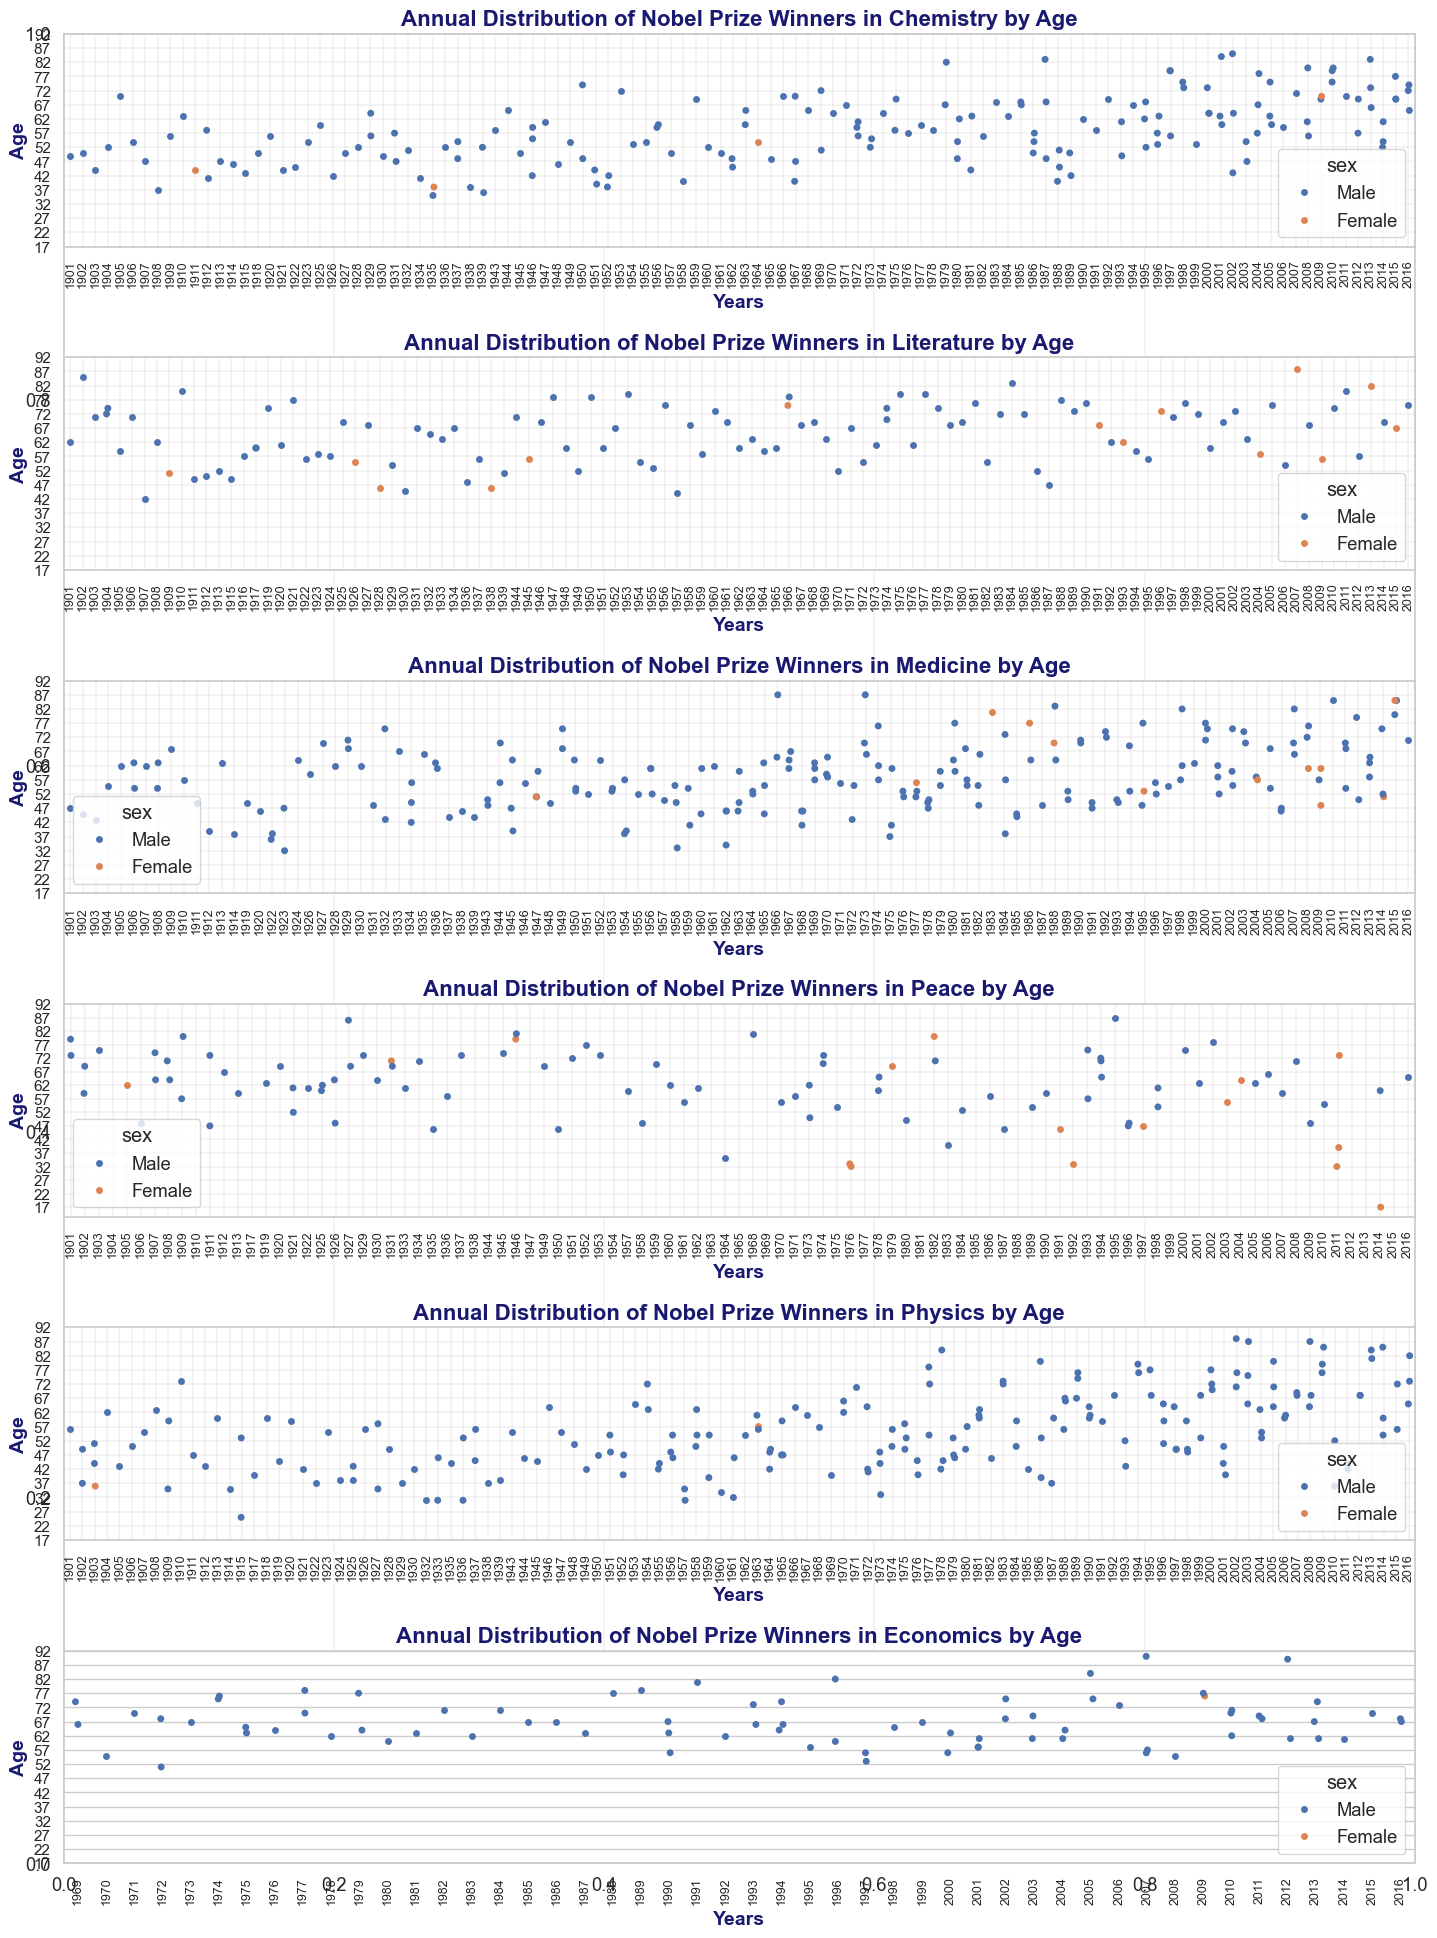

In [23]:
# We converted the year values to datetime format. Let's start by calculating age values and creating an age column.
df["age"] = df["year"] - df["birth_date"].dt.year

# I assign categories to a variable to visualize them by category.
kategoriler= df["category"].unique()

plt.figure(figsize = (15,20))

# For each category, I create age and gender-based graphs as subplots and make the necessary visual arrangements.
for i, category in enumerate(kategoriler):
    plt.grid(linewidth = 0.3)
    plt.subplot(len(kategoriler), 1, 1+i)
    sns.stripplot(data = df[df["category"] == category], x = "year", y = "age", hue = "sex", jitter = True)
    plt.title(f"Annual Distribution of Nobel Prize Winners in {category} by Age", fontsize = 16, fontweight = "bold", color = "midnightblue")
    plt.xlabel("Years", fontsize = 14, color = "midnightblue", fontweight = "bold")
    plt.ylabel("Age", fontsize = 14, color = "midnightblue", fontweight = "bold")
    plt.xticks(rotation = 90, fontsize = 9)
    plt.yticks(range(17, 93, 5), fontsize = 11) # Filtered ages with real values

plt.tight_layout();

#    
## Request 6 : Visualize and interpret the categories and countries of the Nobel Prize winners between 1938-1945.
## Analysis 6

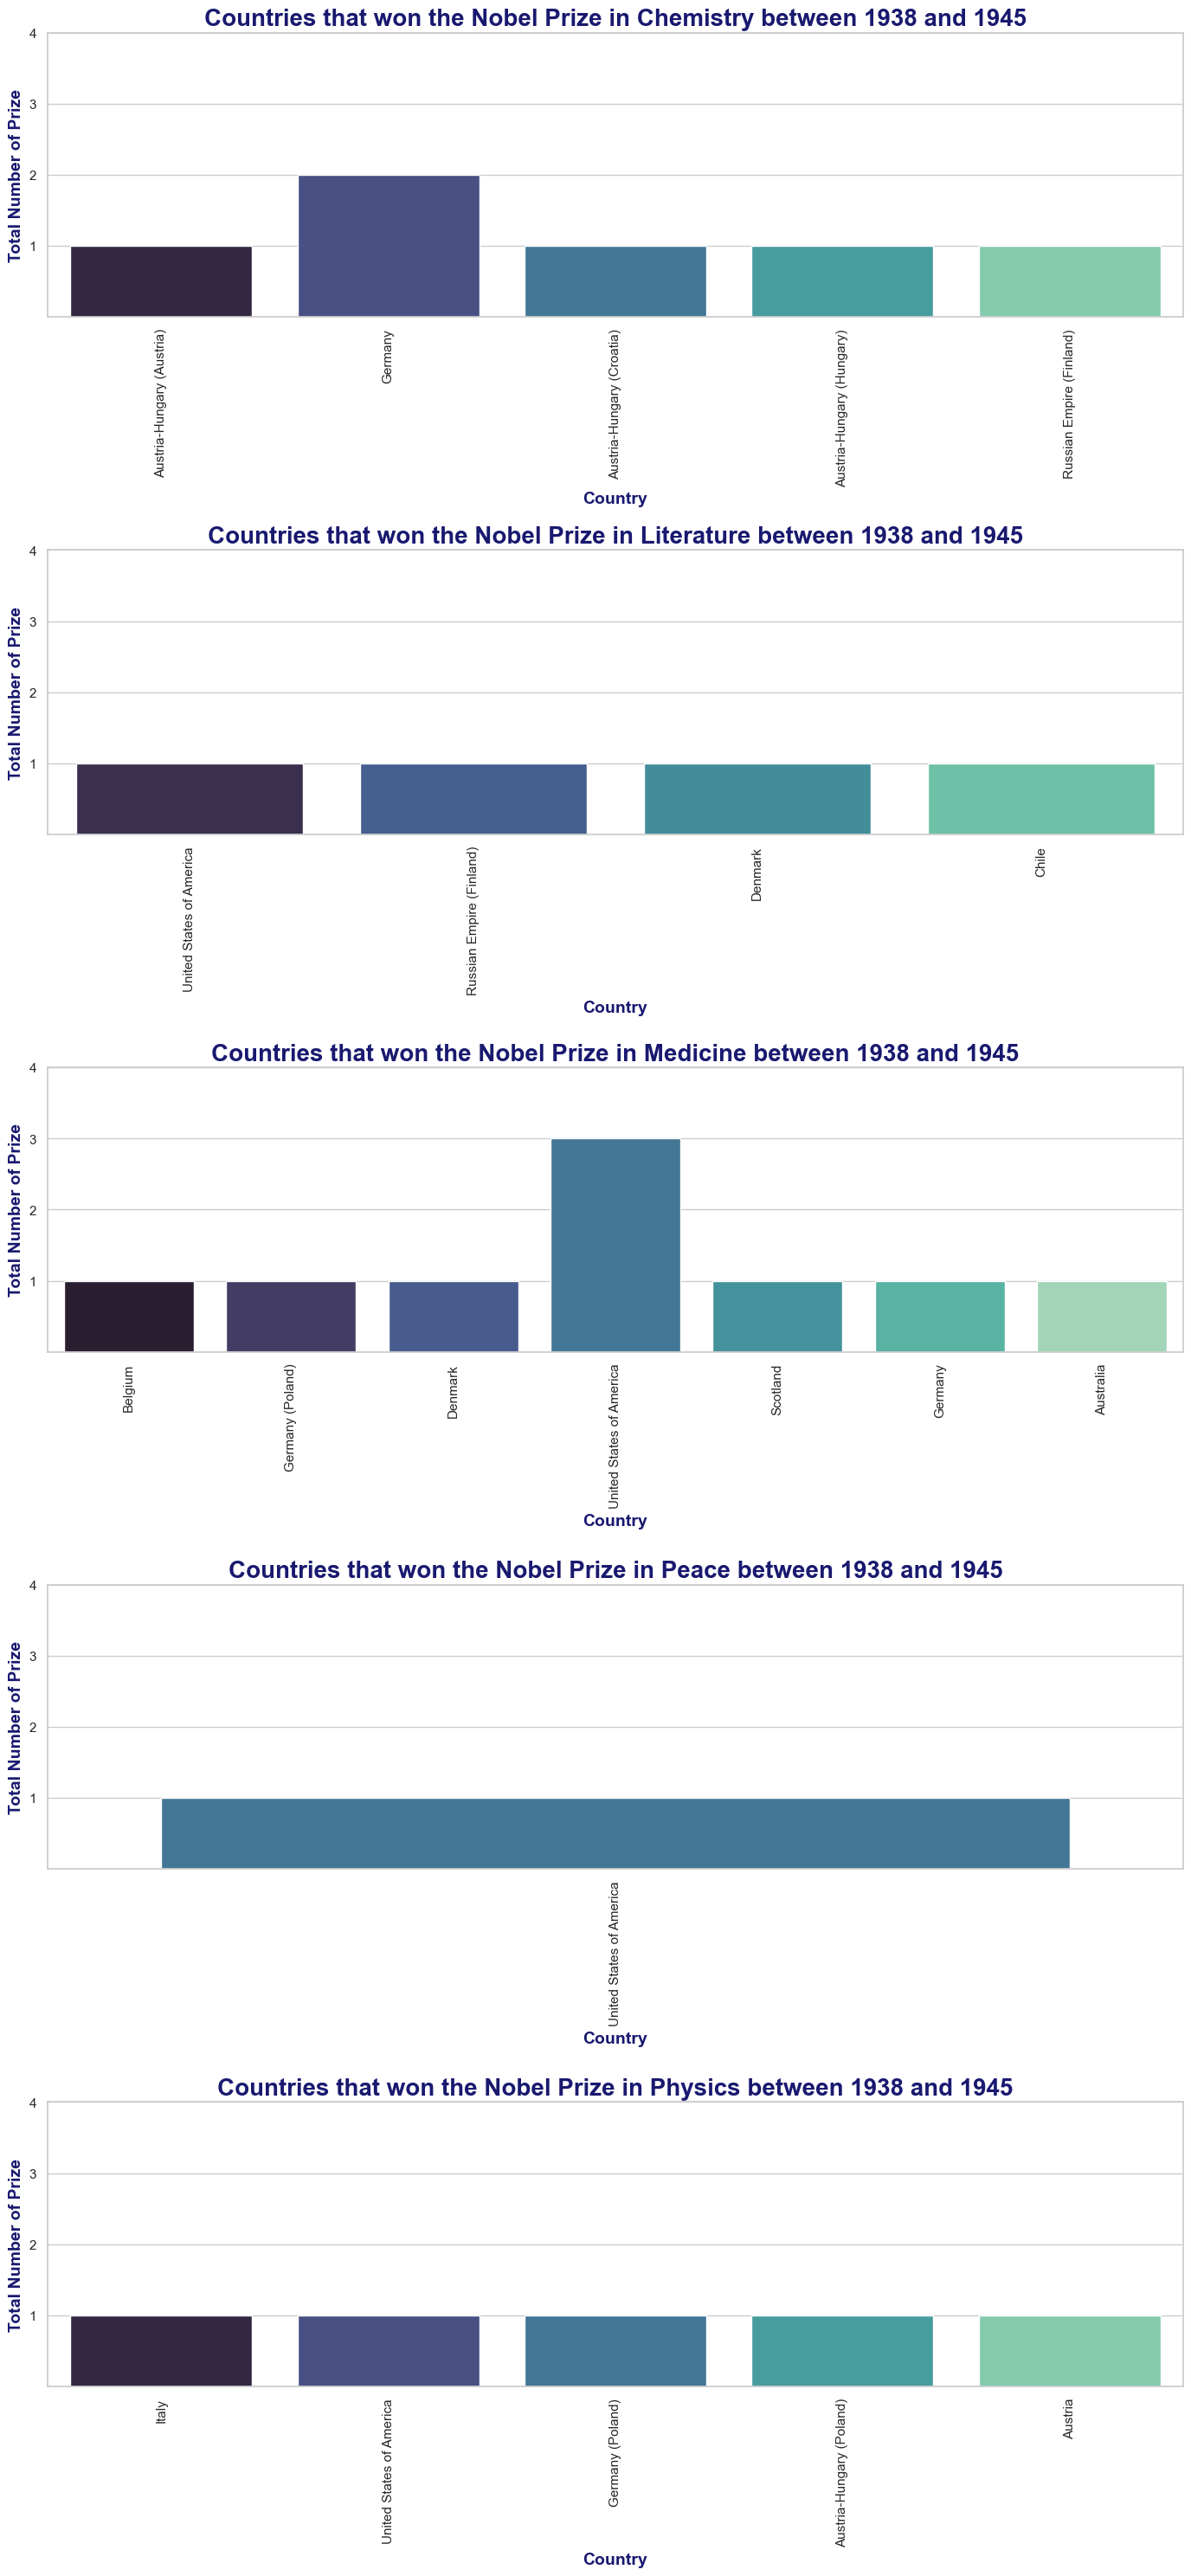

In [24]:
# I filter the years to be analyzed.
yıl_filtre = df[(df["year"] >= 1938) & (df["year"] <= 1945)]
kategoriler = yıl_filtre["category"].unique()

plt.figure(figsize = (14, 30))

# For each category, I filter the data from the years belonging to that category and visualize them as subplots.
for i, category in enumerate(kategoriler):
    plt.subplot(len(kategoriler),1 , i+1)
    ktg_veri = yıl_filtre[yıl_filtre["category"] == category]

    # I prefer to use the birth_country column. 
    # Also, there are too many nan values in organization_country, and since this column is not numeric, they are not suitable for methods like average/meadin-fill.
    sns.countplot(data = ktg_veri, x = "birth_country", palette = "mako") 

    plt.title(f"Countries that won the Nobel Prize in {category} between 1938 and 1945", fontsize = 20, fontweight = "bold", color = "midnightblue")
    plt.xlabel("Country", fontsize = 14, fontweight = "bold", color = "midnightblue")
    plt.ylabel("Total Number of Prize", fontsize = 14, fontweight = "bold", color = "midnightblue")
    plt.xticks(rotation = 90, fontsize = 11)
    plt.yticks(range (1, 5, 1), fontsize = 11)

plt.tight_layout();

#    
## Request 7 : Visualize and interpret the categories and countries of the Nobel Prize winners between 1947-1991. (A separate graph is required for each category)
## Analysis 7

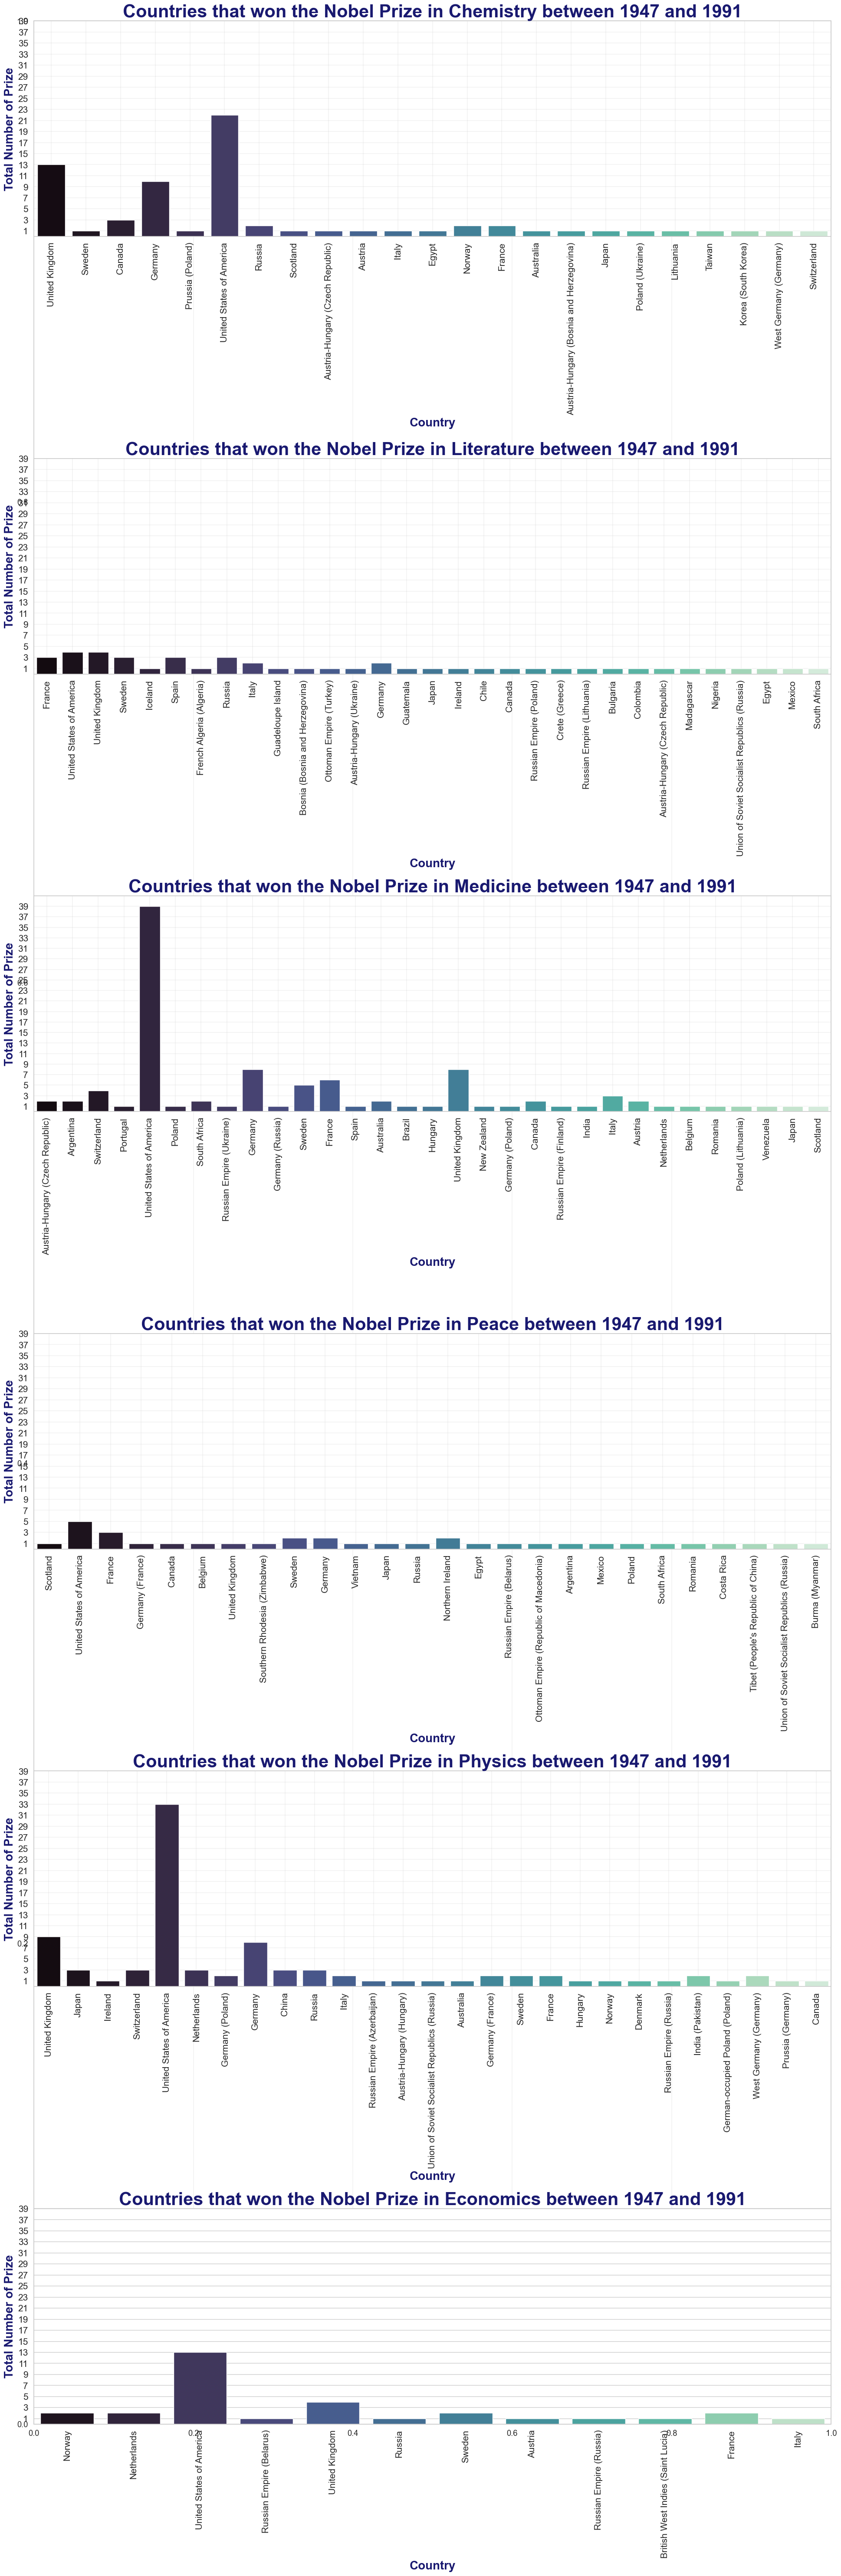

In [26]:
# The same explanations apply as the sixth answer
yıl_filtre = df[(df["year"] >= 1947) & (df["year"] <= 1991)]
kategoriler = yıl_filtre["category"].unique()

plt.figure(figsize = (20, 60))

for i, category in enumerate(kategoriler):
    plt.grid(linewidth = 0.3)
    plt.subplot(len(kategoriler),1 , i+1)
    ktg_veri = yıl_filtre[yıl_filtre["category"] == category]

    sns.countplot(data = ktg_veri, x = "birth_country", palette = "mako")

    plt.title(f"Countries that won the Nobel Prize in {category} between 1947 and 1991", fontsize = 30, fontweight = "bold", color = "midnightblue")
    plt.xlabel("Country", fontsize = 20, fontweight = "bold", color = "midnightblue")
    plt.ylabel("Total Number of Prize", fontsize = 20, fontweight = "bold", color = "midnightblue")
    plt.xticks(rotation = 90, fontsize = 15)
    plt.yticks(range (1, 40, 2), fontsize = 15)

plt.tight_layout();

#    
## Request 8 : Visualize the countries and ages of people after 2000 in the Chemistry, Literature, Peace, Physics and Medicine categories. (Separate visualizations are required for each category)
## Analysis 8

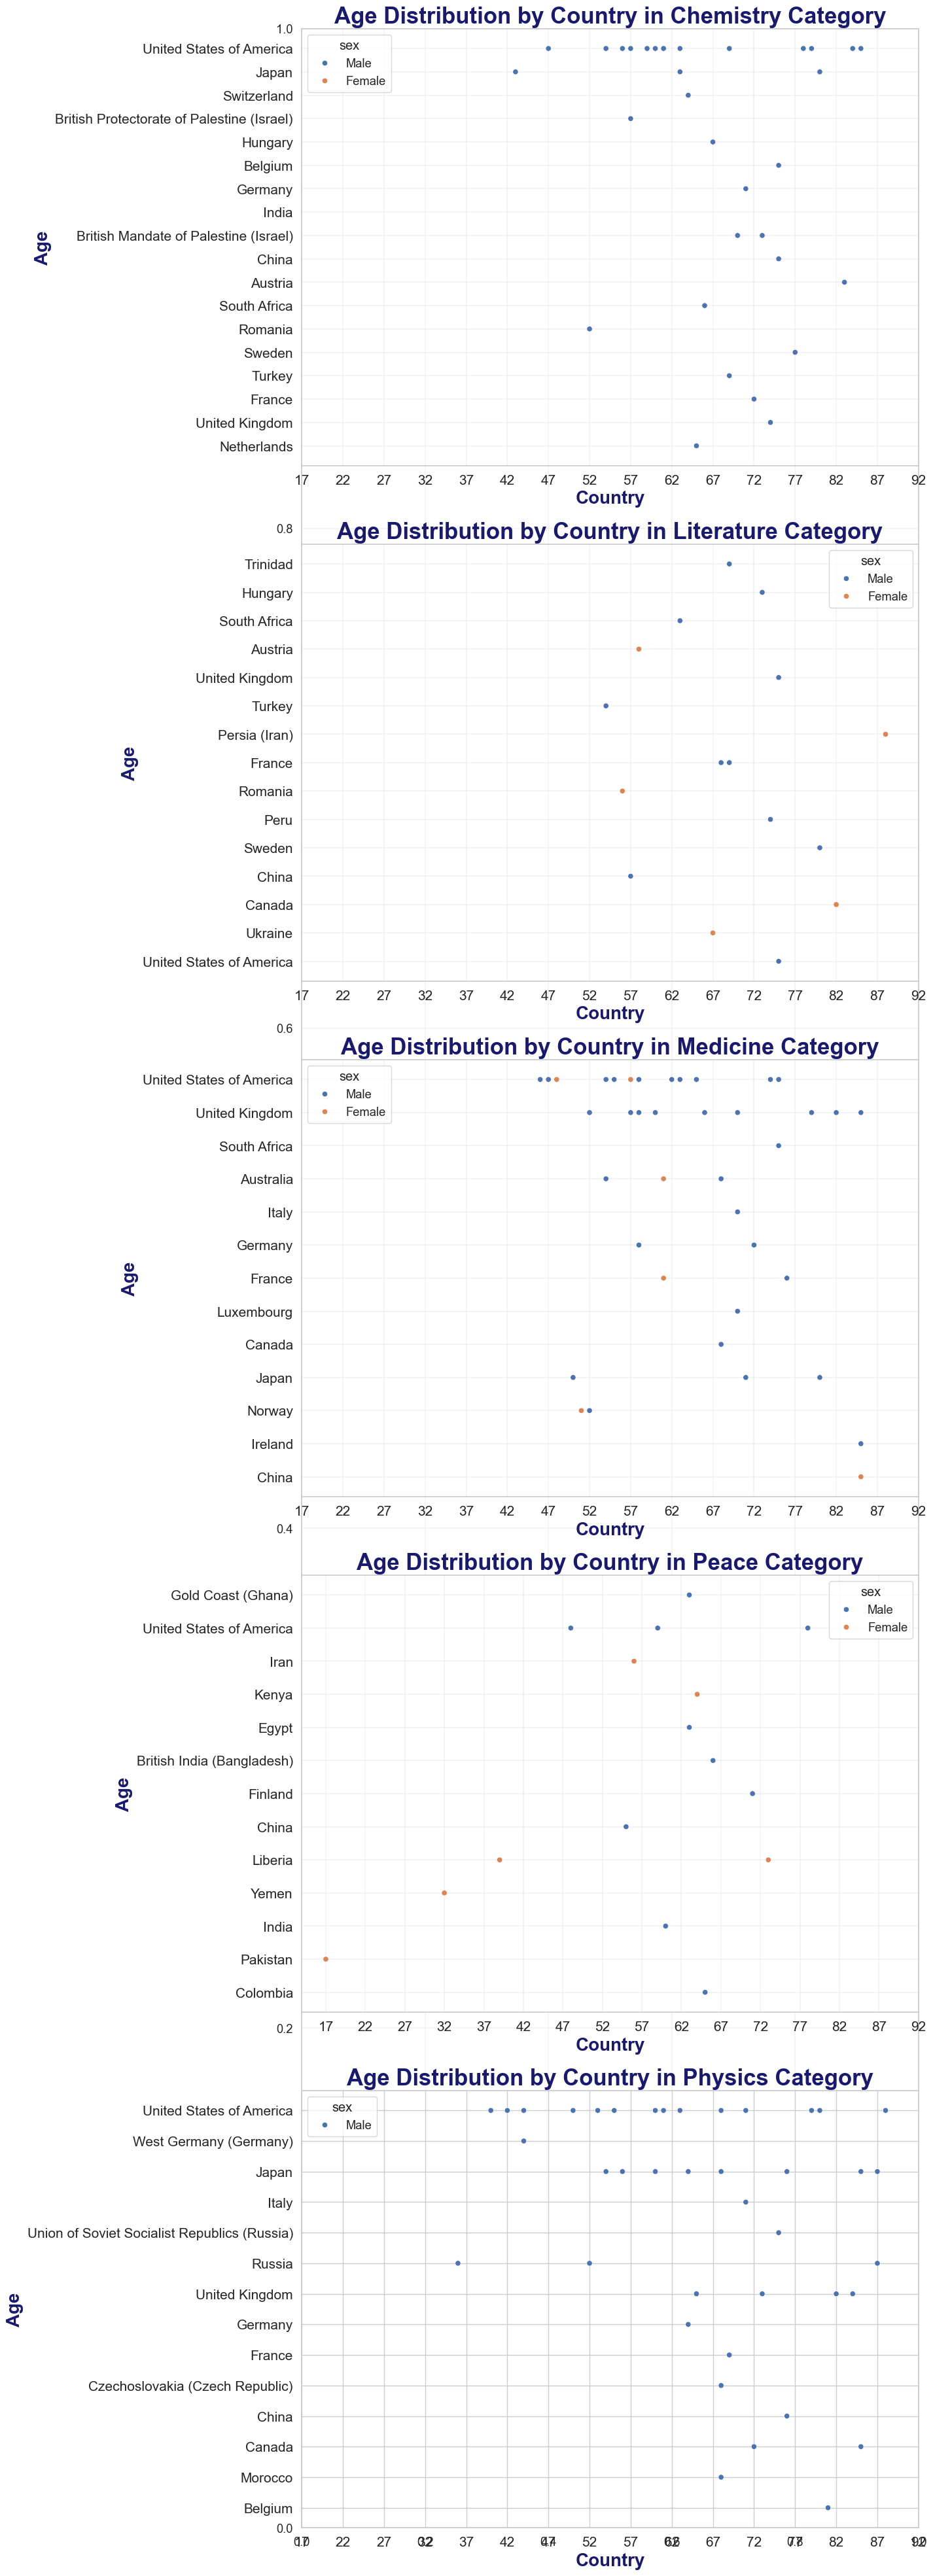

In [27]:
# With the year filter, I determine the desired categories and assign them to variables.
yıl_filtre = df[df["year"] > 2000]
kategoriler = ['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics']

plt.figure(figsize = (15,40))

# Visualization with subplots.
for i, category in enumerate(kategoriler):
    plt.grid(linewidth = 0.3)
    plt.subplot(len(kategoriler), 1, i+1)
    
    ktg_veri = yıl_filtre[yıl_filtre["category"] == category]

    sns.scatterplot(data = ktg_veri, x = "age", y = "birth_country", hue = "sex")
    
    plt.title(f"Age Distribution by Country in {category} Category", fontsize = 25, fontweight = "bold", color = "midnightblue")
    plt.xlabel("Country", fontsize = 20, fontweight = "bold", color = "midnightblue")
    plt.ylabel("Age", fontsize = 20, fontweight = "bold", color = "midnightblue")
    plt.xticks(range(17,95,5), fontsize = 15)
    plt.yticks(fontsize = 15)

plt.tight_layout();

# Since the data set is up to 2016, there are no women Nobel winners in chemistry and physics.
# (Chemistry-2018-D.Strickland, Physics-2018-F.H.Arnold, Physics-2020-E.Charpentier and J.A.Doudna)

# My General Analysis and Comments
1. The vast majority of Nobel prizes have been awarded around the age of 60. This shows that the awarding of the prize requires many years of accumulation of scientific, literary or humanitarian achievements.
2. Very few Nobel prizes have been awarded to women. Particularly fewer in physics, chemistry and medicine. This situation shows the reflection of gender inequalities in the scientific field. It can be linked to the discrimination and lack of educational opportunities faced by women in science and education in previous centuries. 
3. After the Second World War, Western countries dominated the distribution of Nobel prizes by supporting scientific fields. Therefore, a direct correlation can be observed between the number of Nobel prizes and a country's investment in scientific developments.
4. We can clearly see inequalities and periodic effects in the distribution of prizes. For example, there is a strong correlation between the supposedly neutral stance of the United States in the Second World War and the increase in the number of Nobel Prizes after the Second World War.

# Recommendations
1. Incentive rewards can be provided to increase the number of young researchers.
2. Actions can be taken to change discrimination and attitudes in the work environment so that women can participate more in the world of science.
3. Create roles such as talent scouts to discover researchers from different countries to increase diversity.